ICA using MLE methods

In [1]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd

from ica_mle import ICA_MLE
import utils

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
%cd /content/gdrive/MyDrive/IFT-6269-ProjectICA/Ift6269-project-ICA

/content/gdrive/MyDrive/IFT-6269-ProjectICA/Ift6269-project-ICA


In [4]:
!ls

demos	     ICA.ipynb	 ICA.py  infomax_ica.py  README.md
evaluate.py  ica_mle.py  images  __pycache__	 utils.py


In [5]:
# Creating toy signals

# Set a seed for the random number generator for reproducibility
np.random.seed(23)

# Number of samples
ns = np.linspace(0, 200, 1000)

# Source matrix
S = np.array([np.sin(ns * 1), 
              signal.sawtooth(ns * 1.9),
              np.random.random(len(ns))]).T

# Mixing matrix
A = np.array([[0.5, 1, 0.2], 
              [1, 0.5, 0.4], 
              [0.5, 0.8, 1]])

# Mixed signal matrix
X = S.dot(A).T

In [6]:
S.shape

(1000, 3)

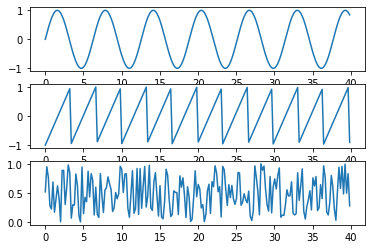

In [7]:
fig, axs = plt.subplots(3)
axs[0].plot(ns[:200], S[:200, 0])
axs[1].plot(ns[:200], S[:200, 1])
axs[2].plot(ns[:200], S[:200, 2])

In [8]:
X.shape

(3, 1000)

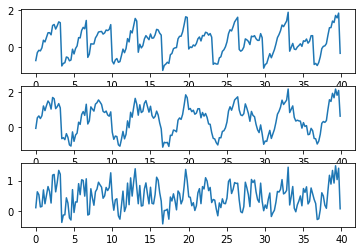

In [9]:
fig, axs = plt.subplots(3)
axs[0].plot(ns[:200], X[0][:200])
axs[1].plot(ns[:200], X[1][:200])
axs[2].plot(ns[:200], X[2][:200])

In [ ]:
ica_mle = ICA_MLE()
Y = ica_mle.sgd(X)

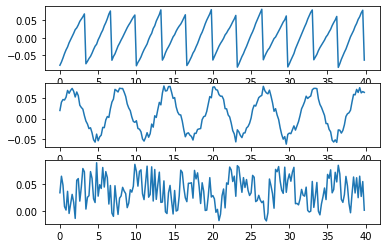

In [14]:
fig, axs = plt.subplots(3)
axs[0].plot(ns[:200], Y[0][:200])
axs[1].plot(ns[:200], Y[1][:200])
axs[2].plot(ns[:200], Y[2][:200])

Implementing it on sound mixtures

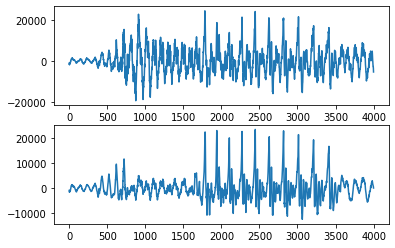

In [16]:
ipd.display(ipd.Audio('demos/mix1.wav'))
ipd.display(ipd.Audio('demos/mix2.wav'))
fs, mix1 = scipy.io.wavfile.read('demos/mix1.wav')
fs, mix2 = scipy.io.wavfile.read('demos/mix2.wav')
fig, axs = plt.subplots(2)
axs[0].plot(mix1[:4000])
axs[1].plot(mix2[:4000])

In [17]:
X_sounds = np.row_stack((mix1, mix2))
X_sounds.shape

(2, 172478)

In [ ]:
Y_sounds = ica_mle.sgd(X_sounds)

In [19]:
Y_sounds.shape

(2, 172478)

In [20]:
ipd.display(ipd.Audio(Y_sounds[0], rate=fs))
ipd.display(ipd.Audio(Y_sounds[1], rate=fs))

From the results, it can be seen that in each source signal, one sound signal is heard pretty well but other sound signal is not completely eliminated with SGD. The log-likelihood keeps oscillating instead of achieving the convergence. Similar results are seen on image data as well.

Implementing on Images :

In [ ]:
img1 = utils.load_img('images/mix1.png', False).ravel()
img2 = utils.load_img('images/mix2.png', False).ravel()
img3 = utils.load_img('images/mix3.png', False).ravel()
X_images = np.row_stack((img1, img2, img3))
print(X_images.shape)

(3, 750000)


In [ ]:
Y_images = baseline_mle_ica(X_images)

In [ ]:
Y_images.shape

(3, 750000)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_img(data):
    data = data.clip(min=0)
    try:
        pilImage = Image.fromarray(data*255)
        ipd.display(pilImage)
    except:
        pilImage = Image.fromarray((data * 255).astype(np.uint8))
        ipd.display(pilImage)

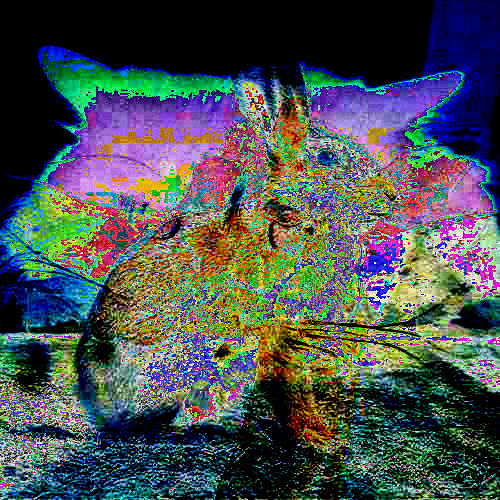

In [ ]:
show_img(Y_images[0].reshape((500, 500, 3)))

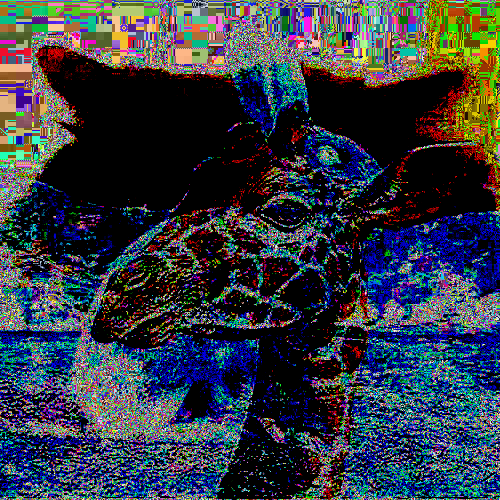

In [ ]:
show_img(Y_images[1].reshape((500, 500, 3)))

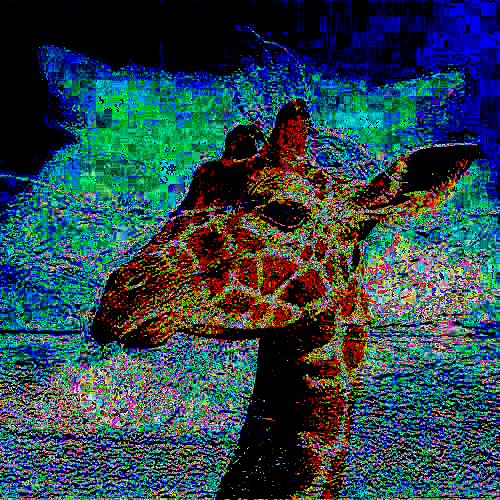

In [ ]:
show_img(Y_images[2].reshape((500, 500, 3)))